<a href="https://colab.research.google.com/github/Raj91027/Movie-Review-using-RNN/blob/main/RNN_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

the movie was great and out of the world, 1
the movie wasn't up to the mark and the screenplay was very slow, 0

In [ ]:
num_words = 15000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print("Y train values: ",np.unique(y_train))
print("Y test values: ",np.unique(y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [ ]:
unique,counts = np.unique(y_train,return_counts=True)
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [ ]:
unique,counts = np.unique(y_test,return_counts=True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


In [ ]:
review_len_train = []
review_len_test = []
for i,j in zip(x_train,x_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))
print(review_len_train)

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120, 121, 259, 180, 160, 114, 59, 343, 513

In [ ]:
print("min: ", min(review_len_train), "max: ", max(review_len_train))

min:  11 max:  2494


In [ ]:
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  7 max:  2315


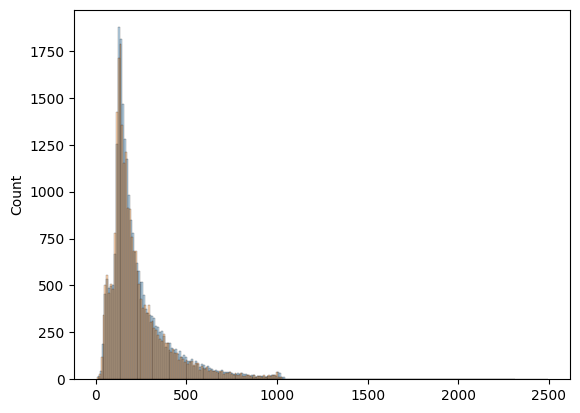

In [ ]:
import seaborn as sns
sns.histplot(review_len_train,alpha=.3);
sns.histplot(review_len_test,alpha=.3);

In [ ]:
from scipy import stats
print("Train mean: ",np.mean(review_len_train))
print("Train median: ",np.median(review_len_train))
print("Train mode: ",stats.mode(review_len_train))

Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=132, count=196)


In [ ]:
# number or words
word_index = imdb.get_word_index()
print(type(word_index))
# print(word_index)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<class 'dict'>


In [ ]:
print("length of word_index: ",len(word_index))

length of word_index:  88584


In [ ]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [ ]:
def whatItSay(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in x_train[index]])
    print(decode_review)
    print(y_train[index])
    return decode_review

decoded_review = whatItSay()

! the original demille movie was made in 1938 with ! march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring ! brynner he of course was brilliant as he almost always seemed to be in all of his movies charlton heston as andrew jackson was a stroke of genius however the movie did tend to get a little long in places it does not move at the pace of the 1938 version still it is a fun movie that should be seen at least once
1


The IMDB dataset reserves the first three indices (0, 1, and 2) for special characters. Here is a brief description of each special character:


*   Index 0: This index is reserved for padding sequences to ensure that they are of equal length.

*   Index 1: This index is reserved for indicating the start of a sequence.


*   Index 2: This index is reserved for out-of-vocabulary words.


These special characters are used to preprocess the text data and tokenize it into sequences of integers. When decoding a sequence of integers back into text, we need to subtract 3 from each index to obtain the correct word

In [ ]:
decoded_review = whatItSay(5)

! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


Preprocess

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen=130
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

maxlen=4
[2,5,1]=[0,2,5,1]
[5,8,1,9,2]=[5,8,1,9]
[2,3]=[0,0,2,3]

In [ ]:
print("X train shape: ",x_train.shape)

X train shape:  (25000, 130)


In [ ]:
print(x_train[5])
print(type(x_train[5]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
<class 'numpy.ndarray'>


In [ ]:
for i in x_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [ ]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


Construct RNN Model

In [ ]:
from keras.models import Sequential
# from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense,Activation
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(x_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = rnn.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 5,batch_size=128,verbose = 1)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.5749 - loss: 0.6723 - val_accuracy: 0.7765 - val_loss: 0.5293
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8053 - loss: 0.4952 - val_accuracy: 0.8272 - val_loss: 0.4139
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8447 - loss: 0.3751 - val_accuracy: 0.8385 - val_loss: 0.3834
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8677 - loss: 0.3240 - val_accuracy: 0.8434 - val_loss: 0.3806
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8906 - loss: 0.2707 - val_accuracy: 0.8405 - val_loss: 0.3774


In [ ]:
score = rnn.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8376 - loss: 0.3851


In [ ]:
print("accuracy:", score[1]*100)

accuracy: 84.04800295829773


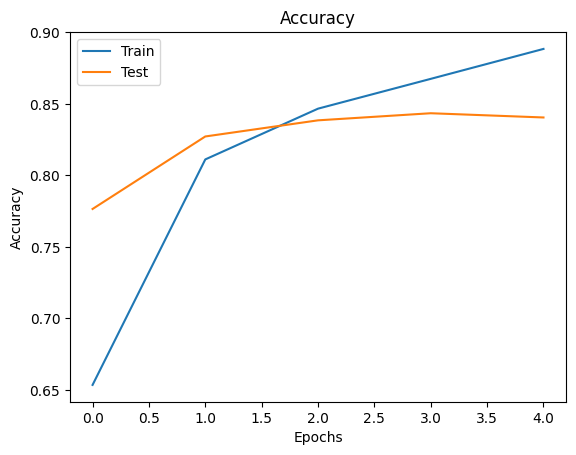

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

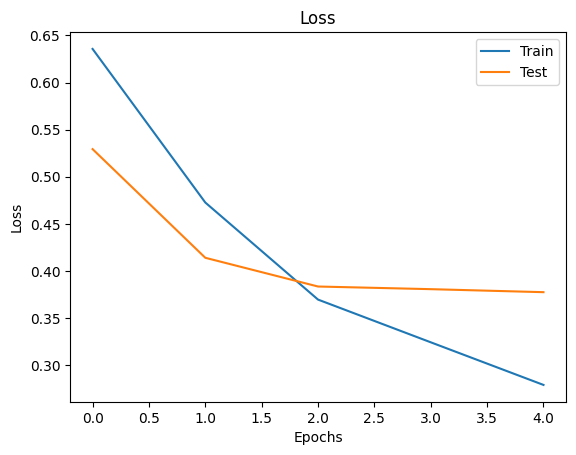

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

# Lets Generate the output using RNN model based upon the users input

In [ ]:

from keras.preprocessing.sequence import pad_sequences
threshold=0.85
# Preprocess the text data
# review = "This movie was great"
review = "This movie was waste of time. I have never watched a worst movie like this "
review = review.lower()
review = review.replace("<br />", " ")
print(review)
# Tokenize the preprocessed text data
t_review=[word_index.get(i,0) if word_index.get(i,0) <= 15000 else 0 for i in review.split(' ')]
print(t_review)
review=[]
review.append(t_review)
print(review)
maxlen=130
review = pad_sequences(review, maxlen=maxlen)

this movie was waste of time. i have never watched a worst movie like this 
[11, 17, 13, 434, 4, 0, 10, 25, 112, 293, 3, 246, 17, 37, 11, 0]
[[11, 17, 13, 434, 4, 0, 10, 25, 112, 293, 3, 246, 17, 37, 11, 0]]


In [ ]:
reverse_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review = " ".join([reverse_index.get(i, "!")  for i in review[0]])
print(decode_review)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! this movie was waste of ! i have never watched a worst movie like this !


In [ ]:

# Predict the sentiment of the movie review
sentiment = rnn.predict(review)[0][0]
# print(sentiment)

if sentiment > threshold:
    print("Positive review!")
else:
    print("Negative review.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Negative review.
